# Predicting Heart Diseases with Logistic Regression and SVM

At this stage in the course, you're familiar with the steps required in a Data Science project. This lab will bring everything you've learned together and guide you through the process.

### Import Libraries

Import the libraries that you will use to do the lab. (Pandas, Numpy, mathplotlib, sklearn, etc)

In [1]:
# ! pip install pandas
# ! pip install nump
# ! pip install matplotlib
# ! pip install scikit-learn
# ! pip install seaborn

In [2]:
### TODO: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

### The Data

The "Framingham" heart disease dataset includes over 1289 records,16 columns and 15 attributes. The goal of the dataset is to predict whether the patient has 10-year risk of future (CHD) coronary heart disease


Read the framingham.csv file into a pandas dataframe. Use read_csv method of pandas (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) 

In [3]:
# TODO: Read in the data
data = pd.read_csv('./framingham.csv')

In [4]:
# TODO: Output the head of the DataFrame.
data.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,37,2.0,1,30.0,0.0,0,0,0,NaN,115.0,79.0,28.41,85.0,NaN,0
1,0,61,1.0,0,0.0,0.0,0,0,0,NaN,115.0,60.0,25.50,76.0,99.0,0
2,1,44,2.0,1,15.0,0.0,0,0,0,209.0,127.0,86.0,26.41,85.0,88.0,0
3,1,47,3.0,1,15.0,0.0,0,1,0,220.0,127.0,93.0,30.70,82.0,57.0,0
4,0,41,3.0,1,3.0,0.0,0,0,0,140.0,110.0,60.0,23.38,65.0,82.0,0


## Exploratory Data Analysis

Exploratory data analysis is an essential step that helps us understand our data in a descriptive manner. Understanding our data helps us prioritize how to clean, modify and featurize it to make it ready for ML models. Let's begin some exploratory data analysis! We'll start by checking out missing data!

#### Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data! https://seaborn.pydata.org/generated/seaborn.heatmap.html

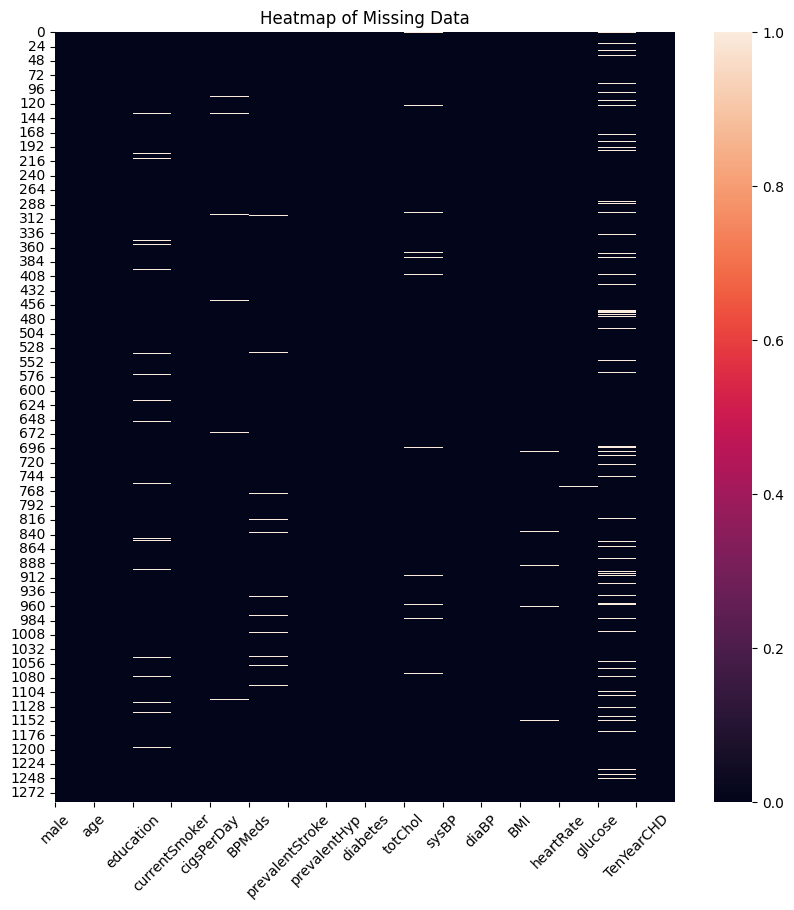

In [5]:
# TODO: Create a heatmap of the DataFrame to visualize missing data

# create a heatmap of missing data points
plt.figure(figsize=(10, 10))
plt.title("Heatmap of Missing Data")
sns.heatmap(data.isnull())

# set the x and y-axis labels
plt.xticks(np.arange(data.shape[1]), data.columns, rotation=45)

# show the plot
plt.show()


Now that we have visualized our missing data, there are muliple ways to tackle it. If not a lot of data is missing under each column(feature) we can use techniques to replace the data, such as replacing it with mean, median or mode. However, if a lot of data is missing ( say about > 90%) then it may be better to drop the feature altogether, since then replacing the missing values can cause a change in the inherent structure of the data. In this lab, we will drop all rows with missing data, but feel free to try using different techniques too.

### Drop Missing Data

Use method dropna of pandas to remove missing values. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [6]:
# TODO: Drop the rows with missing data
data = data.dropna()

### Visualize the data to see if classes are balanced

Class(Target Variable) imbalance is very problematic since it can lead to biases in models. If we have a dataset where 90% target variables are 1 and 10% target varuiables are 0, then we can just predict every data point as 1. This way, we will have 90% accuracy on our dataset, but this is wrong. We can deal with class imbalance using upsampling, downsampling and SMOTE.

Use method countplot of seaborn to plot the number of people with and without heart disease (TenYearCHD). Refer to: https://seaborn.pydata.org/generated/seaborn.countplot.html

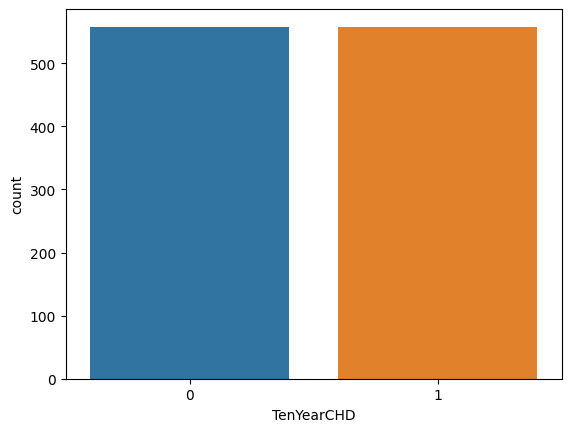

In [7]:
# TODO: Plot the count of people with and without heart disease (TenYearCHD)
col = 'TenYearCHD'

ax = sns.countplot(data=data, x=col)
plt.show()

We see that our classes are not imbalanced

We can also see the distribution of classes grouped by gender. Display the distribution as a countplot. 

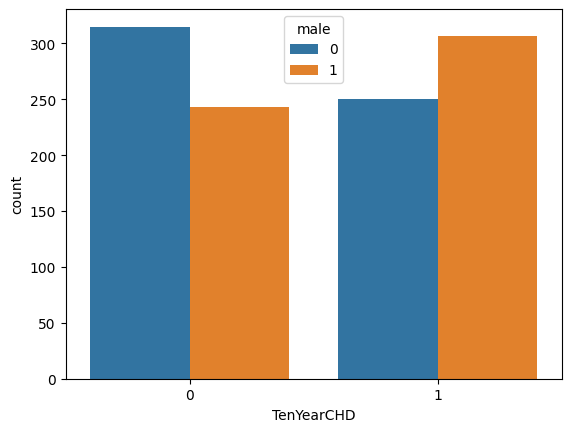

In [8]:
# TODO: Group the data by gender
sns.countplot(data=data, x=col, hue='male')
plt.show()

All of this exploratory data analysis gives us a good idea about our dataset.

### Data Standardization 

Data standardization is a data processing workflow that converts the structure of different datasets into one common format of data. It deals with the transformation of datasets after the data are collected from different sources and before it is loaded into models.

We will use the StandardScaler library to standardize the data :- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [9]:
# TODO: Import the library
from sklearn.preprocessing import StandardScaler

In [10]:
# TODO: Make a list of all numeric features of our dataset
numeric_features = data.select_dtypes(include='number').columns.tolist()

In [11]:
numeric_features.remove('TenYearCHD')

Now apply fit_transform() method of Standard Scaler to normalize all numeric features. 

In [12]:
# TODO: Normalize the numeric features
X = data[numeric_features]

scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(X)

In [13]:
# TODO: Output the head of the DataFrame
data.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2,1.013545,-0.852262,0.086818,0.997313,0.431861,-0.218935,-0.090208,-0.810408,-0.20978,-0.686549,-0.415531,0.079783,0.039784,0.737159,0.099742,0
3,1.013545,-0.502640,1.064616,0.997313,0.431861,-0.218935,-0.090208,1.233947,-0.20978,-0.453261,-0.415531,0.606828,1.008981,0.491341,-0.829773,0
4,-0.986636,-1.201883,1.064616,0.997313,-0.547512,-0.218935,-0.090208,-0.810408,-0.20978,-2.149901,-1.095556,-1.877814,-0.644754,-0.901625,-0.080164,0
5,-0.986636,-0.153018,0.086818,0.997313,0.839934,-0.218935,-0.090208,-0.810408,-0.20978,0.352642,-0.575537,-1.124892,-1.471621,0.327463,-0.409992,0
6,1.013545,0.196603,-0.890980,0.997313,0.431861,-0.218935,-0.090208,1.233947,-0.20978,0.395058,0.184491,0.230367,-0.583755,1.638491,-0.230086,0
7,-0.986636,-1.085343,0.086818,0.997313,0.839934,-0.218935,-0.090208,1.233947,-0.20978,-0.962253,0.304496,0.155075,0.771765,1.720430,-0.739820,0
8,-0.986636,1.362009,2.042414,-1.002694,-0.792356,-0.218935,-0.090208,-0.810408,-0.20978,0.225394,-0.675541,-0.748431,-0.436907,0.163585,-0.230086,0
9,-0.986636,-0.852262,-0.890980,0.997313,-0.057825,-0.218935,-0.090208,-0.810408,-0.20978,-0.219974,-1.375567,-0.899016,-0.952005,-0.328051,-0.050180,0
10,1.013545,-1.551505,1.064616,0.997313,1.084777,-0.218935,-0.090208,1.233947,-0.20978,-1.619701,-0.375530,-0.371970,-0.138693,1.146855,0.009789,0
11,-0.986636,-0.153018,-0.890980,-1.002694,-0.792356,-0.218935,-0.090208,-0.810408,-0.20978,0.819218,-0.455533,-0.673139,-0.997189,-0.901625,-0.320039,0




### Train Test Split
Let's start by splitting our data into a training set (80%) and test set (20%). Refer to : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
target = 'TenYearCHD'
X, y = data.drop(target, axis=1), data[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Building a Logistic Regression model


### Training and Predicting

In [16]:
from sklearn.linear_model import LogisticRegression

Create an instance of Logistic Regression. Refer to: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [17]:
logmodel = LogisticRegression(random_state=0)

Call method fit() to train the logistic regression model. 

In [18]:
logmodel.fit(X_train, y_train)

LogisticRegression(random_state=0)

Call method predict() of logistic regression to make predictions for the test set. 

In [19]:
predictions = logmodel.predict(X_test)

### Evaluation

1. Precision: tell us the proportion of positive indentifications that was actually correct. 
$$ Precision = \frac{True\_Pos}{True\_Pos + False\_Pos}$$


2. Recall: tells us the proportion of actuall positives that was indentified correctly. 
$$ Recall = \frac{True\_Pos}{True\_Pos + False\_Neg}$$


3. F1-score: F1 score is the harmonic mean of precision and recall. 

We can check precision,recall,f1-score using classification report! 

Refer to: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
# TODO: Print the classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74       111
           1       0.74      0.73      0.74       112

    accuracy                           0.74       223
   macro avg       0.74      0.74      0.74       223
weighted avg       0.74      0.74      0.74       223



## Building a Support Vector Classifier model


In [22]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
# TODO: fit the model

SVC()

In [23]:
predictions = svc_model.predict(X_test)

In [24]:
# TODO: Print the classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.77      0.71       111
           1       0.73      0.62      0.67       112

    accuracy                           0.70       223
   macro avg       0.70      0.70      0.69       223
weighted avg       0.70      0.70      0.69       223



In [25]:
# TODO: Print the confusion matrix
print(confusion_matrix(y_test, predictions))

[[85 26]
 [42 70]]


#### Use Grid search 

Grid search is a process that searches exhaustively through a manually specified subset of the hyperparameter space of the targeted algorithm. We need to specify the parameters to search through for best results. 

For SVM we will tune these hyperparameters:

1. Parameter 'C': determines how much you want to avoid missclassfying each training examples. 
2. Parameter 'gamma': Defiens how far the influence of a single training example reaches. High gamma will consider only points close to the hyperplane, and low gamma will consider points at a greater distance

Now we will use GridSearchCV to find the best parameters for the model. Refer to: https://scikit-learn.org/stable/modules/grid_search.html

In [26]:
from sklearn.model_selection import GridSearchCV

In [83]:
param_grid = {
    'C': np.linspace(1e-2, 1e6, num=10), 
    'gamma': np.linspace(1, 1e-6, num=10)
} 

In [84]:
svc_model = SVC()
grid = GridSearchCV(svc_model, param_grid, cv=5, verbose=3)
grid.fit(X_train, y_train)
# TODO: Fit the grid

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .................C=0.01, gamma=1.0;, score=0.503 total time=   0.0s
[CV 2/5] END .................C=0.01, gamma=1.0;, score=0.503 total time=   0.0s
[CV 3/5] END .................C=0.01, gamma=1.0;, score=0.500 total time=   0.0s
[CV 4/5] END .................C=0.01, gamma=1.0;, score=0.500 total time=   0.0s
[CV 5/5] END .................C=0.01, gamma=1.0;, score=0.500 total time=   0.0s
[CV 1/5] END ............C=0.01, gamma=0.888889;, score=0.503 total time=   0.0s
[CV 2/5] END ............C=0.01, gamma=0.888889;, score=0.503 total time=   0.0s
[CV 3/5] END ............C=0.01, gamma=0.888889;, score=0.500 total time=   0.0s
[CV 4/5] END ............C=0.01, gamma=0.888889;, score=0.500 total time=   0.0s
[CV 5/5] END ............C=0.01, gamma=0.888889;, score=0.500 total time=   0.0s
[CV 1/5] END ............C=0.01, gamma=0.777778;, score=0.503 total time=   0.0s
[CV 2/5] END ............C=0.01, gamma=0.77777

[CV 3/5] END .......C=222222.23, gamma=0.888889;, score=0.562 total time=   0.0s
[CV 4/5] END .......C=222222.23, gamma=0.888889;, score=0.545 total time=   0.0s
[CV 5/5] END .......C=222222.23, gamma=0.888889;, score=0.596 total time=   0.0s
[CV 1/5] END .......C=222222.23, gamma=0.777778;, score=0.587 total time=   0.0s
[CV 2/5] END .......C=222222.23, gamma=0.777778;, score=0.598 total time=   0.0s
[CV 3/5] END .......C=222222.23, gamma=0.777778;, score=0.551 total time=   0.0s
[CV 4/5] END .......C=222222.23, gamma=0.777778;, score=0.545 total time=   0.0s
[CV 5/5] END .......C=222222.23, gamma=0.777778;, score=0.590 total time=   0.0s
[CV 1/5] END .......C=222222.23, gamma=0.666667;, score=0.592 total time=   0.0s
[CV 2/5] END .......C=222222.23, gamma=0.666667;, score=0.615 total time=   0.0s
[CV 3/5] END .......C=222222.23, gamma=0.666667;, score=0.562 total time=   0.0s
[CV 4/5] END .......C=222222.23, gamma=0.666667;, score=0.556 total time=   0.0s
[CV 5/5] END .......C=222222

[CV 2/5] END .......C=444444.45, gamma=0.666667;, score=0.615 total time=   0.0s
[CV 3/5] END .......C=444444.45, gamma=0.666667;, score=0.562 total time=   0.0s
[CV 4/5] END .......C=444444.45, gamma=0.666667;, score=0.556 total time=   0.0s
[CV 5/5] END .......C=444444.45, gamma=0.666667;, score=0.596 total time=   0.0s
[CV 1/5] END C=444444.45, gamma=0.5555559999999999;, score=0.581 total time=   0.0s
[CV 2/5] END C=444444.45, gamma=0.5555559999999999;, score=0.592 total time=   0.0s
[CV 3/5] END C=444444.45, gamma=0.5555559999999999;, score=0.573 total time=   0.0s
[CV 4/5] END C=444444.45, gamma=0.5555559999999999;, score=0.579 total time=   0.0s
[CV 5/5] END C=444444.45, gamma=0.5555559999999999;, score=0.590 total time=   0.0s
[CV 1/5] END .......C=444444.45, gamma=0.444445;, score=0.559 total time=   0.0s
[CV 2/5] END .......C=444444.45, gamma=0.444445;, score=0.587 total time=   0.0s
[CV 3/5] END .......C=444444.45, gamma=0.444445;, score=0.573 total time=   0.0s
[CV 4/5] END 

[CV 4/5] END C=666666.67, gamma=0.5555559999999999;, score=0.579 total time=   0.0s
[CV 5/5] END C=666666.67, gamma=0.5555559999999999;, score=0.590 total time=   0.0s
[CV 1/5] END .......C=666666.67, gamma=0.444445;, score=0.559 total time=   0.0s
[CV 2/5] END .......C=666666.67, gamma=0.444445;, score=0.587 total time=   0.0s
[CV 3/5] END .......C=666666.67, gamma=0.444445;, score=0.573 total time=   0.0s
[CV 4/5] END .......C=666666.67, gamma=0.444445;, score=0.590 total time=   0.0s
[CV 5/5] END .......C=666666.67, gamma=0.444445;, score=0.590 total time=   0.0s
[CV 1/5] END .......C=666666.67, gamma=0.333334;, score=0.547 total time=   0.0s
[CV 2/5] END .......C=666666.67, gamma=0.333334;, score=0.570 total time=   0.0s
[CV 3/5] END .......C=666666.67, gamma=0.333334;, score=0.579 total time=   0.0s
[CV 4/5] END .......C=666666.67, gamma=0.333334;, score=0.601 total time=   0.0s
[CV 5/5] END .......C=666666.67, gamma=0.333334;, score=0.579 total time=   0.0s
[CV 1/5] END C=666666.

[CV 3/5] END .......C=888888.89, gamma=0.444445;, score=0.573 total time=   0.0s
[CV 4/5] END .......C=888888.89, gamma=0.444445;, score=0.590 total time=   0.0s
[CV 5/5] END .......C=888888.89, gamma=0.444445;, score=0.590 total time=   0.0s
[CV 1/5] END .......C=888888.89, gamma=0.333334;, score=0.547 total time=   0.0s
[CV 2/5] END .......C=888888.89, gamma=0.333334;, score=0.570 total time=   0.0s
[CV 3/5] END .......C=888888.89, gamma=0.333334;, score=0.579 total time=   0.0s
[CV 4/5] END .......C=888888.89, gamma=0.333334;, score=0.601 total time=   0.0s
[CV 5/5] END .......C=888888.89, gamma=0.333334;, score=0.579 total time=   0.0s
[CV 1/5] END C=888888.89, gamma=0.22222299999999995;, score=0.564 total time=   0.0s
[CV 2/5] END C=888888.89, gamma=0.22222299999999995;, score=0.575 total time=   0.0s
[CV 3/5] END C=888888.89, gamma=0.22222299999999995;, score=0.596 total time=   0.0s
[CV 4/5] END C=888888.89, gamma=0.22222299999999995;, score=0.596 total time=   0.0s
[CV 5/5] END

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.0000000e-02, 1.1111112e+05, 2.2222223e+05, 3.3333334e+05,
       4.4444445e+05, 5.5555556e+05, 6.6666667e+05, 7.7777778e+05,
       8.8888889e+05, 1.0000000e+06]),
                         'gamma': array([1.00000e+00, 8.88889e-01, 7.77778e-01, 6.66667e-01, 5.55556e-01,
       4.44445e-01, 3.33334e-01, 2.22223e-01, 1.11112e-01, 1.00000e-06])},
             verbose=3)

In [85]:
grid_predictions = grid.predict(X_test)

In [86]:
# TODO: Print the classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72       111
           1       0.73      0.70      0.71       112

    accuracy                           0.72       223
   macro avg       0.72      0.72      0.72       223
weighted avg       0.72      0.72      0.72       223



In [87]:
# TODO: Print the confusion matrix
print(confusion_matrix(y_test, grid_predictions))

[[82 29]
 [34 78]]


### Observations and results

Write down your observations

In [88]:
# TODO: Compare the accuracy of the models
list(grid.cv_results_.keys())

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_C',
 'param_gamma',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score']

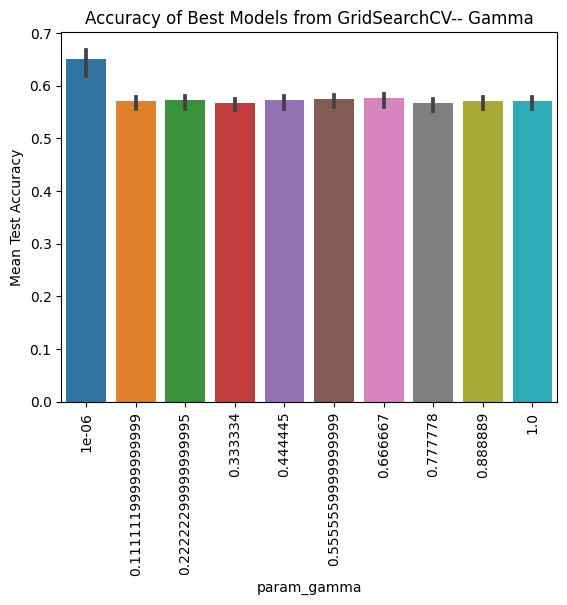

In [89]:
results = pd.DataFrame(grid.cv_results_)

# select columns with best parameters and score
desired_cols = ['param_gamma', 'mean_test_score']
desired_results = results[desired_cols]

# plot results using seaborn's barplot function
sns.barplot(x='param_gamma', y='mean_test_score', data=desired_results)
plt.title('Accuracy of Best Models from GridSearchCV-- Gamma')
plt.ylabel('Mean Test Accuracy')

plt.xticks(rotation=90)

plt.show()

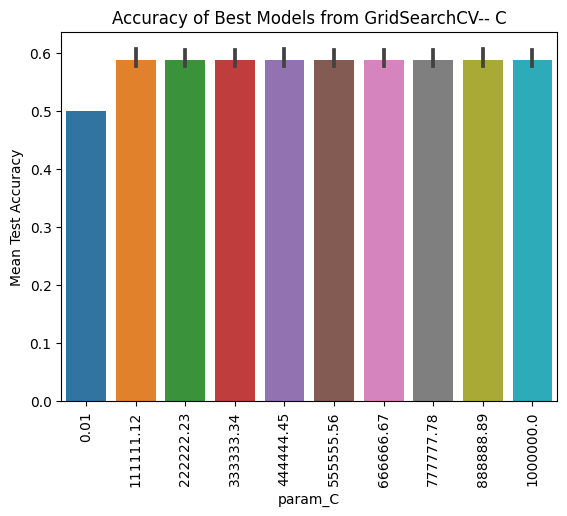

In [90]:

# select columns with best parameters and score
desired_cols = ['param_C', 'mean_test_score']
desired_results = results[desired_cols]

# plot results using seaborn's barplot function
sns.barplot(x='param_C', y='mean_test_score', data=desired_results)
plt.title('Accuracy of Best Models from GridSearchCV-- C')
plt.ylabel('Mean Test Accuracy')

plt.xticks(rotation=90)

plt.show()

In [91]:
print(grid.best_params_)

{'C': 888888.89, 'gamma': 1e-06}


## It seems the best model performance was achieved when a high C value and a low gamma value was used